# 4-bit Adder

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure, makeCirc

In [3]:
backend = Aer.get_backend('statevector_simulator')

1100


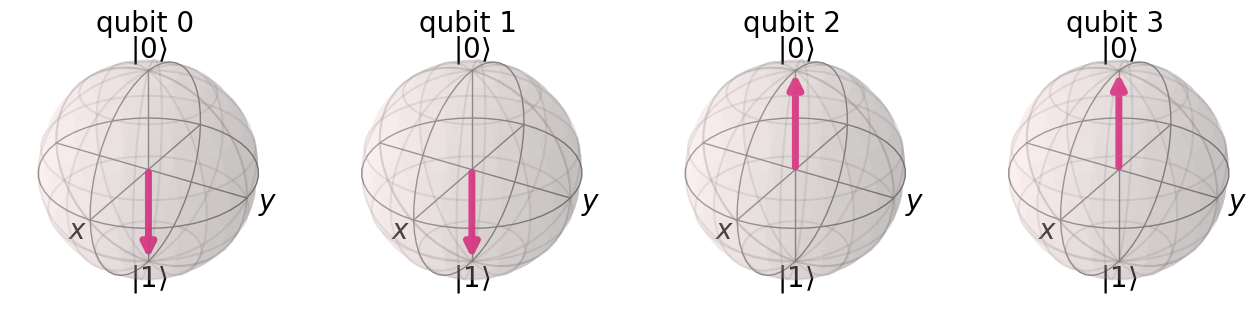

In [4]:
circ = makeCirc(4, 1)
getBloch(circ, backend)

In [5]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

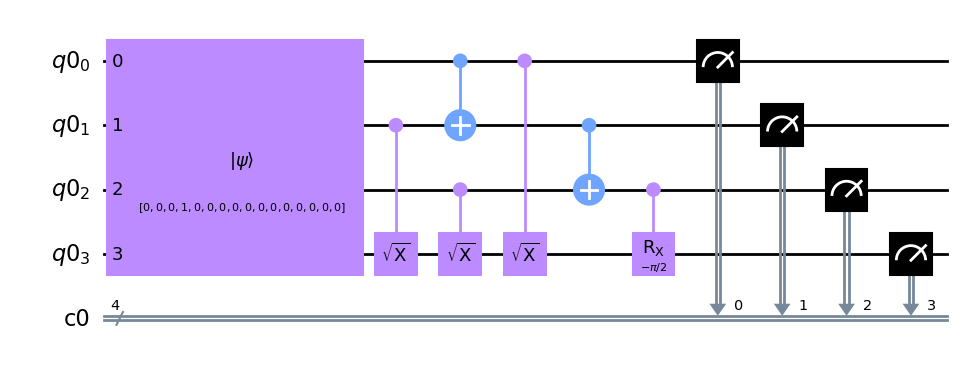

In [6]:
circ.draw('mpl')

In [7]:
getMeasure(circ, 1, backend)[0][::-1]

'1001'

In [8]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [9]:
fullAdder = circ.to_gate(label=' Adder')

In [10]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

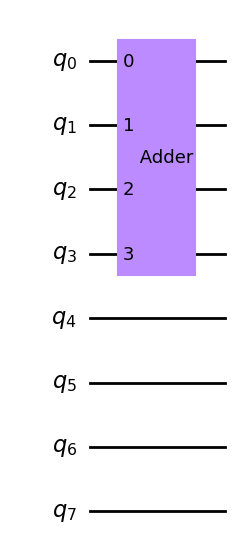

In [11]:
circ2.draw('mpl')

In [12]:
def fourAdder(a1, a2):
    qubits = len(a1) + len(a2) + 5
    qr = QuantumRegister(qubits)
    qc = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '00000')
    circuit.initialize(initializedState, qr)
    
    # each fullAdder ladders down into the next one 
    circuit.append(fullAdder, [0, 4, 8, 9])
    circuit.append(fullAdder, [1, 5, 9, 10])
    circuit.append(fullAdder, [2, 6, 10, 11])
    circuit.append(fullAdder, [3, 7, 11, 12])
    
    for i in range(0, qubits):
        circuit.measure(i, i)
    return circuit

In [13]:
a = '1100'
b = '0011'

In [14]:
circ = fourAdder(a, b)

In [16]:
getMeasure(circ, 1, backend)[0][:5]

'01111'

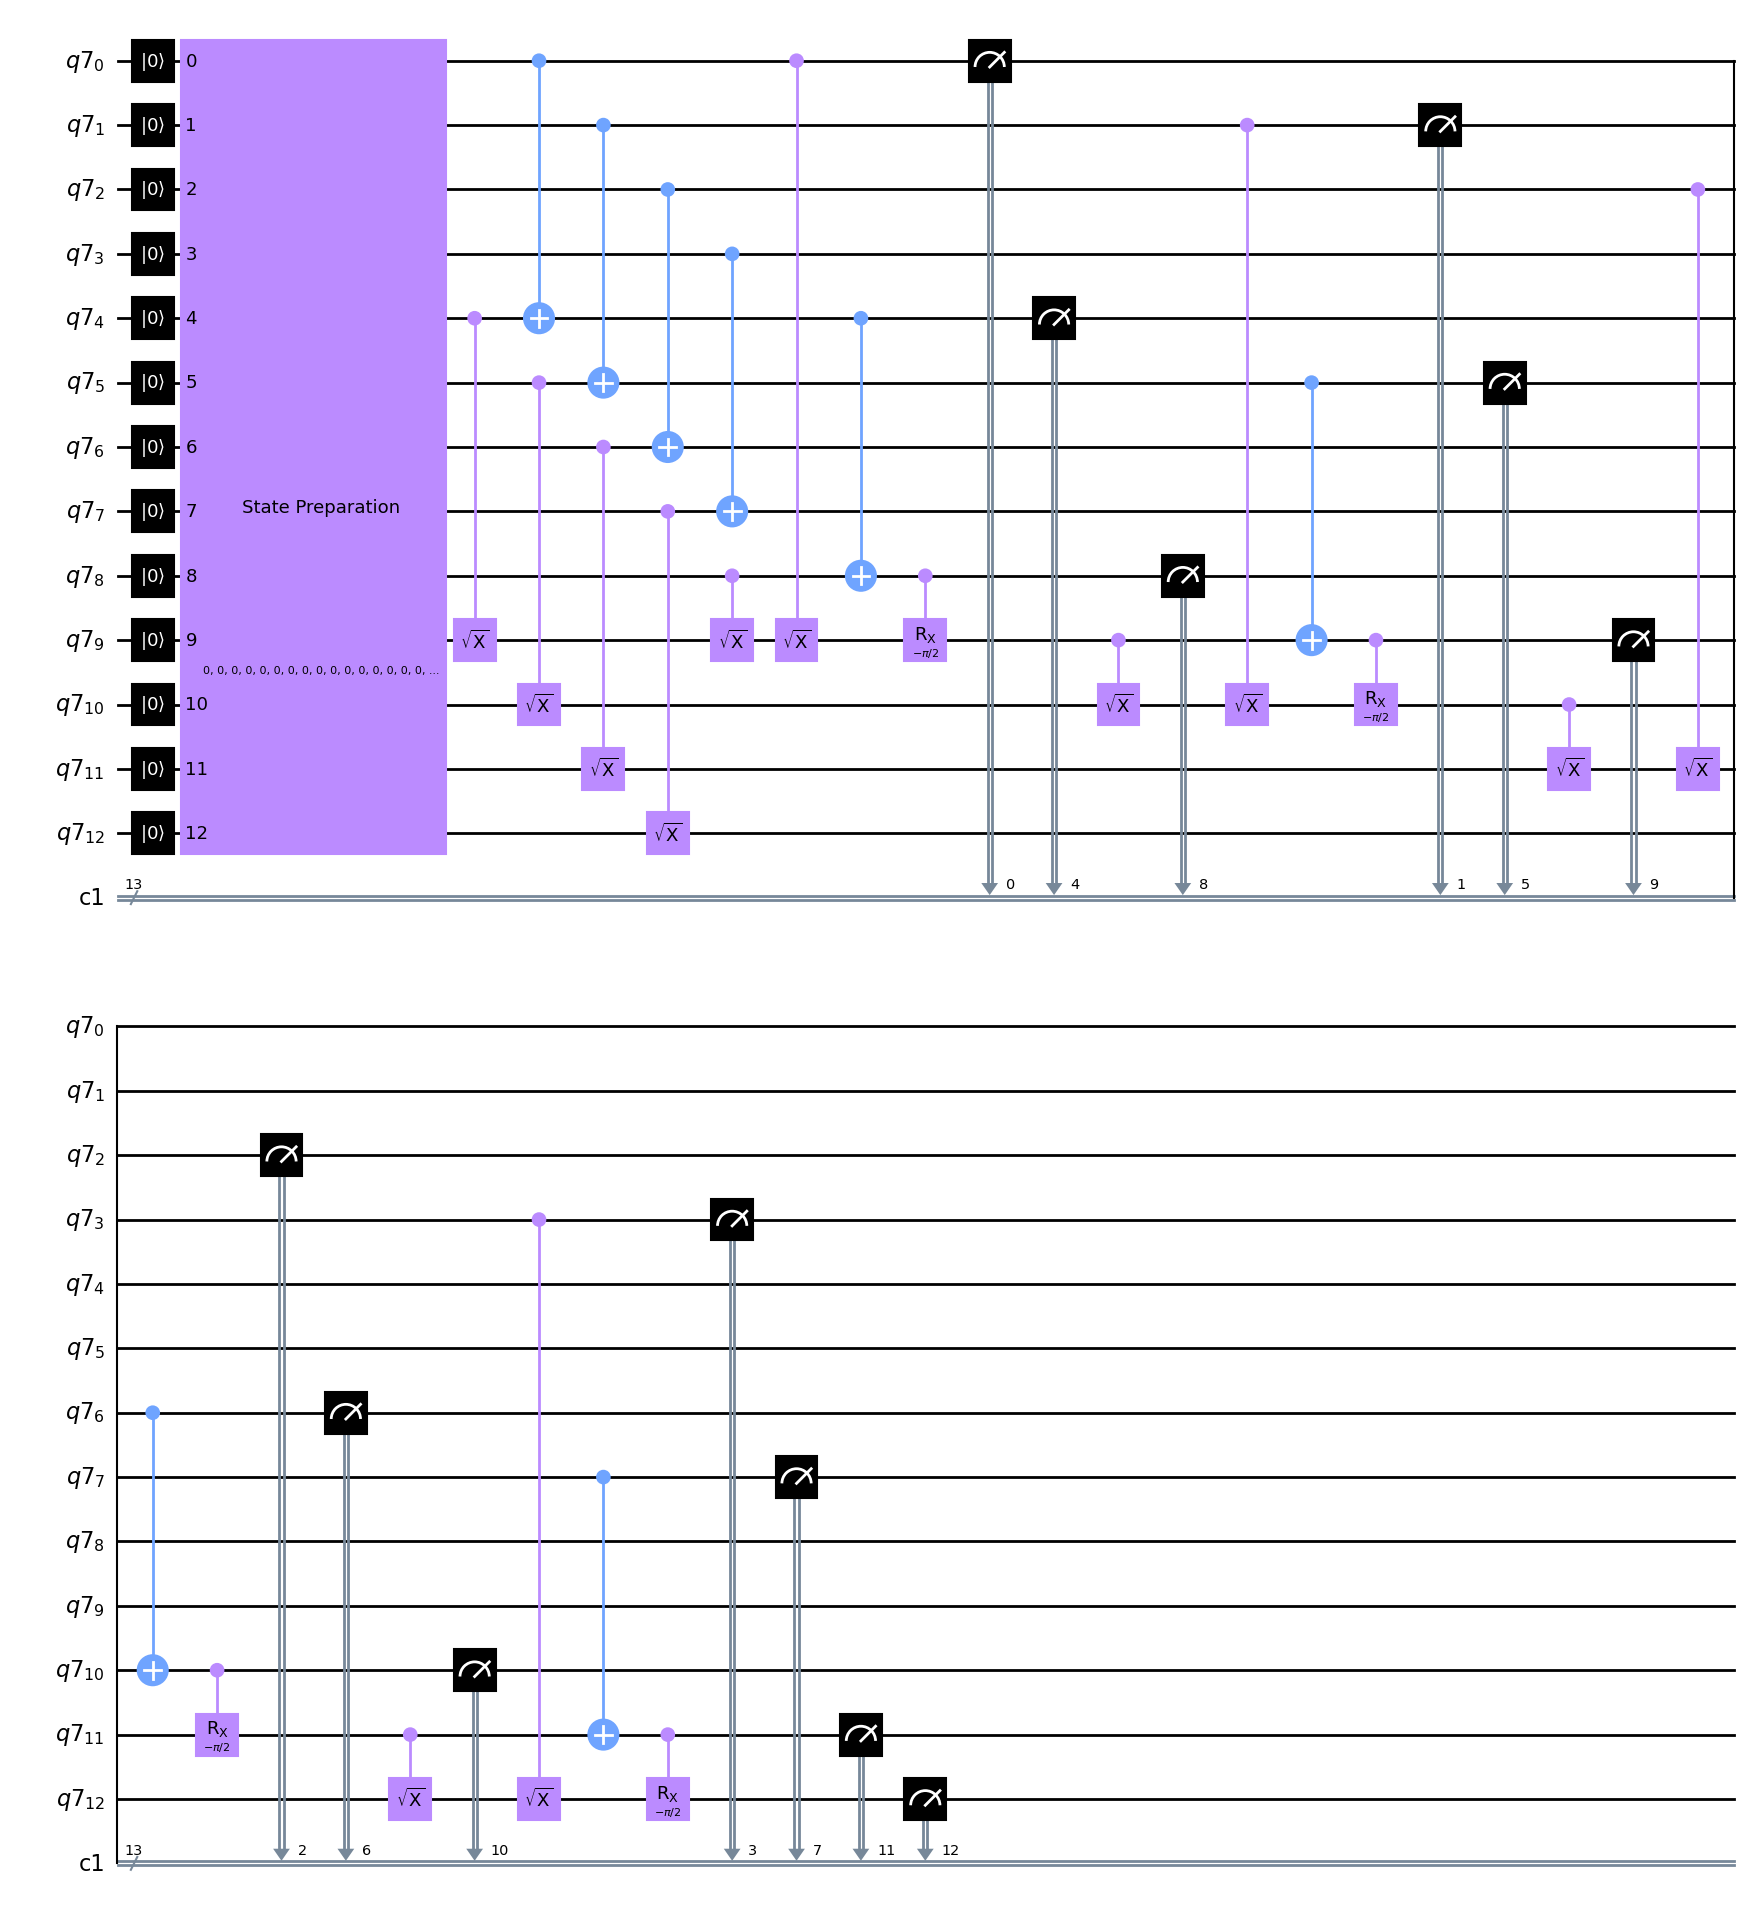

In [17]:
circ.decompose().draw('mpl')

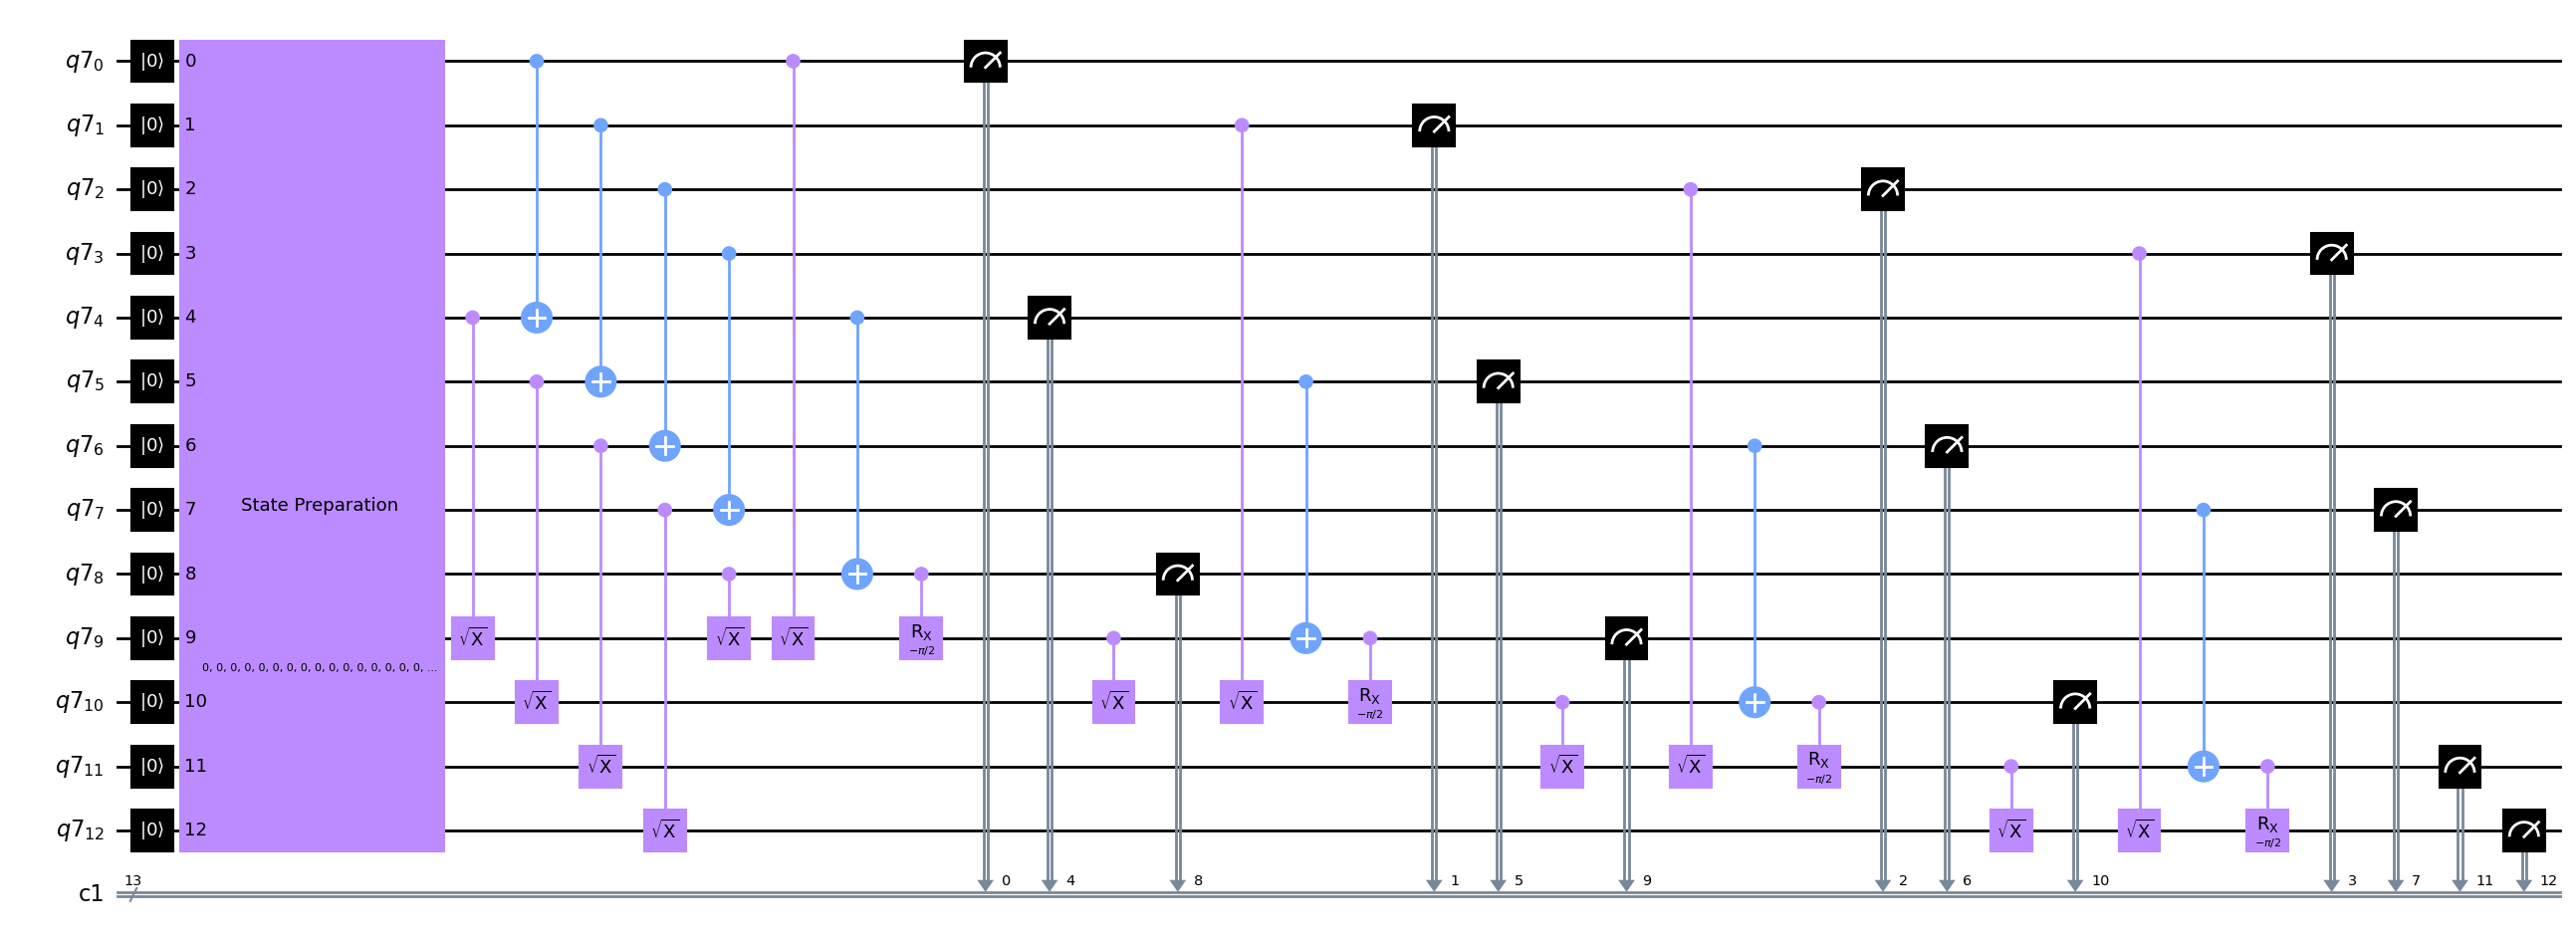

In [18]:
circ.decompose().draw('mpl', fold=-1)